# Hochschule Bonn-Rhein-Sieg

# Neural Networks, WS17/18

# Assignment 05 (06-november-2017)

##  Debaraj Barua, Naresh Kumar Gurulingan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import IPython
sp.init_printing()

---
## Question 1: 

Summary of Haykin NN edition 2 : chapter 3.1-3.5.

#### Answer 1:

##### Single Layer Perceptrons

- Perceptron is the simplest form of neural network with varying weights that enables classification of linearly separable patterns.

- It consists of a single neuron with adjustable synaptic weight and bias, and is able to classify two linearly separable classes. 

- These free parameters are adjsuted during training to learn the weights that enables linear separation of the classes 

- These parameters represent a decision hyperplane  between these classes.

##### Adaptive Filtering Problem

- Considering a dynamical system, whose mathematical characterization is unknown.

- The adaptive filtering problem addresses how to design a multiple input and single output model of the aforemetntioned dynamic system by building it around a single linear neuron.

- This model operates under the influence of an algorithm that controls how the synaptic weights of the neuron are updated.

    - The algorithm starts from arbitary setting of the synaptic weight.
    
    - Adjustments to these weights are made continuously in respinse to statistical variations in the system's behaviour.
    
    - Computation of these adjustments are completed in a time interval that is one sampling period long.
    
- The operation conssists of two continuous processes:

    - *Filtering process*, which involves computation of the two signals:
    
        - Output signal, on the basis of the input vector on the  model represented by the neuron.
        
        - Error Signal, which is the difference of the output signal from the desired output (produced by the unknown system)
        
    - Adaptive process, which invovles automatic adjustment of the weights of the model, in accordance to the error produced.
    
- Thus the two processes work together to constitute a feedback loop around the neuron.  

#####  Unconstrained Optimization Techniques

Considering a cost function $\varepsilon(w)$ that is continuously differentiable function of some unknown weight vector $w$. This function is a measure of how to choose the weight vector $w$ of an adaptive filtering algorithm so it behaves in an optimum manner. We want to find an optimal solutuion $w^*$, which satisfies,
$$\varepsilon(w^*) \leq \varepsilon(w)$$

So, we need to minimize the cost function with respect to weight vector. That is, for optimality,

$$\nabla \varepsilon(w^*)=0$$

Methods:

- *Method of Steepest descent* is applied to the weight vector w are in the direction of the steepest descent. This will be acting in the direction opposite to the gradient vector.
$$ w(n+1) = w(n) - \nabla \varepsilon (w)$$

- *Newton's Method* esentially minimizes the quadratic approximation of cost function around the current weight.
$$ w(n+1) = w(n) - {H}^{-1}(n)g(n) $$
Where,
$H(n)=\nabla\nabla\varepsilon(w(n))$, and
$g(n)=\nabla \varepsilon (w(n))$

- *Gauss-Newton Method* is a special case of the Newton's method and is applicable only to a cost function that is expressed as the sum of error squares.
$$\varepsilon(w)=\frac{1}{2}\sum_{i=1}^{n}e^2(i)$$
The weight vector is trained by all the data from the entire observation interval till $n$. Thus it is a batch learning procedure

##### Linear Least-Squares Filter

- Characteristics:

    - The single neuron around which it is built is linear.
    - The cost function $\varepsilon(w)$ used to design the filter consists of sum if error squares, similar to that of Gauss-Newton method.
        $$w(n+1)=X^+(n)d(n)$$
    where, 
        \begin{align*}
        d(n) &= \text{Desired output vector}\\
        &=\begin{bmatrix}d(1)\\d(2)\\.\\.\\d(n)\end{bmatrix}\\
        X^+(n) &= \text{pseudoinverse of the data matrix } X(n)\\
        X(n) &= \text{Input data matrix }\\
        &=\begin{bmatrix}x(1)\\x(2)\\.\\.\\x(n)\end{bmatrix}\\
        \end{align*}
- Wiener Filter:

    - It is the limiting form of the linear least-squares filter for an Ergodic environment.
    - In such a case, we can substitute the long term sample aversages or time-averages for expectations.
    - Then above equation can be rewritten using second order statistics as:
        $$w_o=R_x^{-1}r_{xd}$$
        where,
        \begin{align*}
        R_x &= \text{Correlation matrix of input vector }x(i)\\
        r_{xd}&= \text{Cross-correlation vector between the input vector }x(i)\text{ and the desired output }d(i)\\
        w_o &=\text{Weiner Solution, to the linear optimum filtering problem}
        \end{align*}
    
##### Least Mean Square Algorithm

- Characteristics:

    - It is based on the use of instantaneous values of the cost function, i.e.,
        $$\varepsilon(w)=\frac{1}{2}e^2(n)$$
    - It can be formulated as,
        $$\hat w(n+1)=\hat w(n)+\eta x(n)e(n)$$

- Convergence consideration:

    - LMS algorithm is convergent in mean square in the below mentioned region:
        $$0<\eta<\frac{2}{\lambda_{max}}$$
      Where, $\lambda_{max}$ is the largest eigen value of the correlation matrix of the input vector.

- Virtues and Limitations:

    - Virtues:
    
        - Simple
        - Independent and Robust; i.e., small model uncertainity and small disturbance.
        - LMS is optimal in accordance to $H^{\infty}$ or minimax criterion.
        
    - Limitations:
    
        - Slow rate of convergence.
        - Sensitivity to variation in Eigen structure of input.

---
## Question 2 (Haykin Edition:2, Ex: 3.1): 

Explore the method of steepest descent involving a single weight $w$ by considering the following cost function:
$$\varepsilon(w)=\frac{1}{2}\sigma^2-r_{xd}w+\frac{1}{2}r_xw^2$$
where, $\sigma^2$,$r_{xd}$ and $r_x$ are constants.

#### Answer 2:

In [2]:
s,r_xd,r_x,w=sp.symbols('s,r_xd,r_x,w')

e=1./2.*s**2-r_xd*w+1./2.*r_x*w**2

nabla=sp.diff(e,w)
nabla

So, Gradient, 
\begin{align*}
\nabla \varepsilon (w)  &= \frac {\partial \varepsilon(w) } {\partial w}\\
&=-r_{xd}+r_xw
\end{align*}

According to steepest descent method, weight vector is updated in the direction of the steepest descent, i.e., in the direction opposite to the gradient vector.

So, $\Delta w=-\eta \nabla \varepsilon (w)$, where $\eta$ is the learning rate

Now, updated weight is:

\begin{align*}
 w(n+1) &= w(n) + \Delta w\\
 &=w(n)- \eta (-r_{xd}+r_xw)
\end{align*}

*Notes from class solution:*
- Represent cost function as $\varepsilon=\varepsilon_{min} + \lambda (w-w^*)$

Simplified expression:
$$\varepsilon=\underbrace{\frac{\sigma^2r_x^2-r_{xd}^2}{2r_x}}_{\varepsilon_{min}}+\underbrace{\frac{r_x}{2}}_\lambda{(w-\frac{r_{xd}}{r_x})}^2$$

\begin{align*}
\frac{d\varepsilon}{dw}&=2\lambda(w-w^*)
\end{align*}

Now, for $w_1$,
\begin{align*}
w_1&=\frac{d\varepsilon}{dw}w_0+2\mu \lambda w^*\\
&=(1-2\lambda)\\
W_k&=
\end{align*}

Finally,
$$0<\mu<\frac{1}{\lambda}$$
$$0<\mu<\frac{2}{r_x}$$


---
## Question 3 (Haykin Edition:2, Ex: 3.2): 

Consider the cost function
$$\varepsilon(w)=\frac{1}{2}\sigma^2-r_{xd}^Tw+\frac{1}{2}w^TR_xw$$
where, $\sigma^2$,$r_{xd}$ and $r_x$ are constants.
$$r_{xd}=\begin{bmatrix}0.8182\\0.354\end{bmatrix}$$
$$R_x\begin{bmatrix}1 & 0.8182\\0.8182 & 1\end{bmatrix}$$

### 3(a)
Find the optimum value of $w^*$ for which $\varepsilon(w)$ reaches it's minimum value.

#### Answer 3(a):
$\varepsilon(w)$ will reach maximum value when it's Jacobian will be zero.

In [2]:
s=sp.symbols('s')
w=sp.MatrixSymbol('w',2,1)
r_xd=sp.Matrix([[0.8182],[0.354]])
R_x=sp.Matrix([[1,0.8182],[0.8182,1]])

e=1./2.*s**2-r_xd.T.dot(sp.Matrix(w))+1./2.*sp.Matrix(w).T.dot(R_x.dot(sp.Matrix(w)))
e=sp.Matrix([e])
symbolic_jacobian=e.jacobian(w)
print "Jacobian Matrix is:"
symbolic_jacobian

Jacobian Matrix is:


In [3]:
print "optimum values of weight, w*:"
sp.Matrix([sp.solve(symbolic_jacobian,sp.Matrix(w))])

optimum values of weight, w*:


### 3(b) 
<p>Use the method of steepest descent to compute $w^*$ for the following two values of learning rate parameter:</p>
    (i)  $\eta=0.3$
    (ii) $\eta=1.0$
<p>For each case, plot the trajectory traced the evolution of the weight vector $w(n)$ in the W-Plane.</p>
<p>*Note*: The trajectories obtained for cases (i) and (ii) of part (b) should correspond to the picture in Fig. 3.2</p>


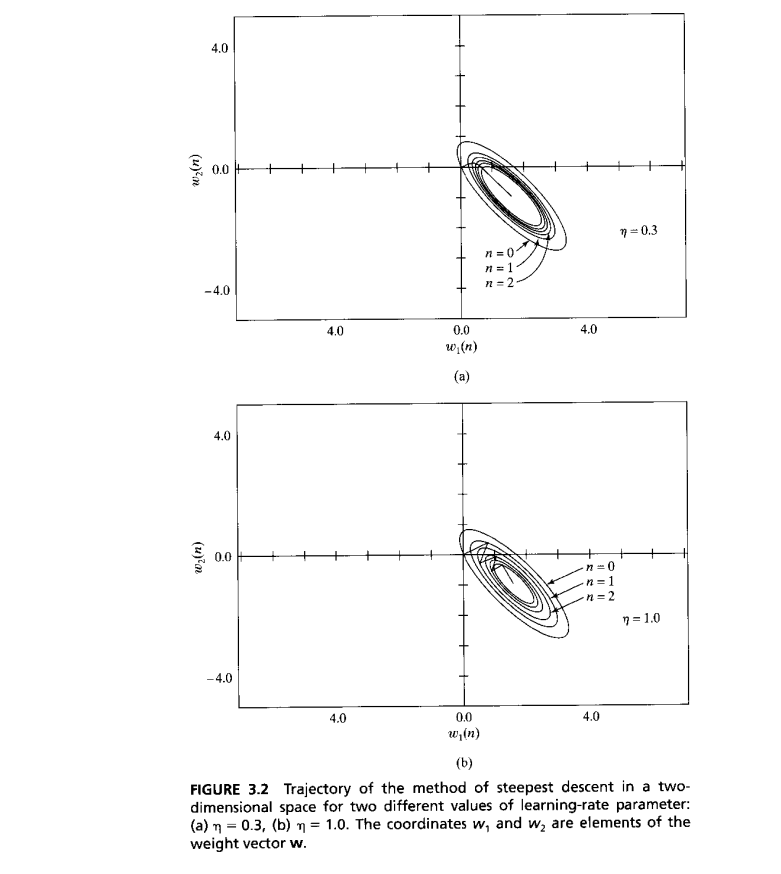

In [5]:
IPython.display.Image("images/HaykinFig3.2.png")

#### Answer 3(b):

In [13]:
#Lambda function for substitution of weight into symbolic jacobian matrix.
delta_wt_func=sp.lambdify((w),symbolic_jacobian) 
e_val_func=sp.lambdify((w),e)

def steepest_desc(weight, eta, max_iteration):
    found_optimum=False
    iteration=0
    wt_matrix=np.array(weight).T
    e_matrix=[]
    print "Learning Rate: ", eta
    while (found_optimum==False and iteration<max_iteration):
        iteration+=1
        delta_wt=delta_wt_func(weight)
        e_val=e_val_func(weight)
        
        if(abs(delta_wt.all())<1e-5):
            """
            If absolute change in weight is less than 10^(-5), 
            we consider we have reached the optimal solution
            """
            print "Reached optimum value"
            print "Absolute change in weight is less than 10^(-5), exiting loop."
            found_optimum=True
            break
        else:
            e_matrix.append(e_val)
            weight+=-eta*delta_wt.T
            wt_matrix=np.vstack((wt_matrix,weight.T))
    
    e_matrix=np.array(e_matrix)
    print "!!!!!", e_matrix.shape
    if iteration==max_iteration:
        print "Max iteration reached!"
    print "optimum values of weight, w*:",np.array(weight).T
    print "Total iterations required:",iteration
    #print wt_matrix.shape
    plt.plot(wt_matrix[:,0],wt_matrix[:,1])
    #TODO: from class: plot contour
    #plt.contour(wt_matrix[:,0],wt_matrix[:,1],e_matrix[:])
    plt.scatter(e_matrix,np.linspace(0,200))
    plt.xlabel("w1(n)")
    plt.ylabel("w2(n)")
    plt.title(("Learning Rate",eta))
    plt.show()
            
initial_weight = sp.Matrix([[0],[0]])
print initial_weight.shape
eta1 = 0.3
eta2 = 1.0
max_iteration =1000
steepest_desc(initial_weight,eta1,max_iteration)
steepest_desc(initial_weight,eta2,max_iteration)


(2, 1)
Learning Rate:  0.3
Reached optimum value
Absolute change in weight is less than 10^(-5), exiting loop.
!!!!! (180, 1, 1)
optimum values of weight, w*: [[1.59897673946915 -0.954273186504682]]
Total iterations required: 181
(181, 2)


ValueError: x and y must be the same size

---
## Question 4 (Haykin Edition:2, Ex: 3.4): 

The correlation matrix $R_x$ of the input vector $x(n)$ in the LMS algorithm is defined by
$$R_x=\begin{bmatrix}1&0.5\\0.5&1\end{bmatrix}$$
Define the range of values for the learning-rate parameter $\eta$ of the LMS algorithm for it to be convergent in the mean square.

#### Answer 4:
LMS algorithm is convergent in mean square in the below mentioned region:
$$0<\eta<\frac{2}{\lambda_{max}}$$
Where, $\lambda_{max}$ is the largest eigen value of the correlation matrix of the input vector.

*Class Inputs*

Or,
$$0<\eta<\frac{2}{tr[R_x]}$$
and $tr[R_x]$ is the trace of the correlation matrix R_x, which is easier to calculate than the $\lambda_{max}$

In [16]:
R_x=np.array([[1,0.5],[0.5,1]])

eigval,eigvec=np.linalg.eig(R_x)
max_eigvalue=eigval[np.argmax(eigval)]
print "According to largest eigen value, Range of values for learning rate: (0,",2./max_eigvalue,")"

#After inputs in class.
trace=np.trace(R_x)
print "According to trace, Range of values for learning rate: (0,",2/trace,")"

According to largest eigen value, Range of values for learning rate: (0, 1.33333333333 )
According to trace, Range of values for learning rate: (0, 1.0 )


---
## Question 5 (Haykin Edition:2, Ex: 3.8): 

The ensemble-averaged counterpart of the sum of error squares viewed as a cost function is the mean-square value of the error signal:
\begin{align*}
J(w)&=\frac{1}{2}E[e^2(n)]\\
&=\frac{1}{2}E[{(d(n)-x^T(n)w)}^2]
\end{align*}

### 5(a)
Assuming that the input vector $x(n)$ and the desired response $d(n)$ are drawn from a stationary environment, show that
$$J(w)=\frac{1}{2}\sigma^2_d-r^T_{xd}w+\frac{1}{2}w^TR_xw\\$$
where,
\begin{align*}
\sigma_d^2&=E[d^2(n)]\\
r_{xd}&==E[x(n)d(n)]\\
R_x&==E[x(n)x^T(n)]\\
\end{align*}

### Answer:

Given: 
\begin{align*}
J(w)&=\frac{1}{2}E[{(d(n)-x^T(n)w)}^2]\\
&=\frac{1}{2}E[{d}^2(n)-2\cdot d(n)x^T(n)w+(x^T(n)w)^2]\\
\end{align*}

Since expectation is a linear operator:
\begin{align*}
&=\frac{1}{2}E[{d}^2(n)]-\frac{1}{2}\cdot 2\cdot E[d(n)x^T(n)w]+\frac{1}{2}E[(x^T(n)w)^2]\\
&=\frac{1}{2}E[{d}^2(n)]-E[d(n)x^T(n)w]+\frac{1}{2}E[(x^T(n)w)^T(x^T(n)w)]\\
&=\frac{1}{2}E[{d}^2(n)]-E[d(n)x^T(n)w]+\frac{1}{2}E[w^Tx(n)x^T(n)w]\\
&=\frac{1}{2}E[{d}^2(n)]-E[d(n)x^T(n)]w+\frac{1}{2}w^TE[x(n)x^T(n)]w\\
\end{align*}

Substituting $\sigma_d^2, r_{xd}^T = E[d(n)x^T(n)]$ and $R_x$, we have:
$$J(w)=\frac{1}{2}\sigma^2_d-r^T_{xd}w+\frac{1}{2}w^TR_xw\\$$
which is the required proof.

### 5(b)
For this cost function, show that the gradient vector and the Hessian matrix of $J(w)$ are as follows, respectively:
\begin{align*}
g &= -r_{xd}+R_xw\\
H&=R_x
\end{align*}

### Answer:

The gradient vector is obtained by partial differentiation of J(w) with respect to w:
\begin{align*}
\nabla J(w)&=g=-r_{xd}+R_xw
\end{align*}

The Hessian matrix is the partial derivative of gradient vector with respect to w:
\begin{align*}
H&=\nabla g=R_x
\end{align*}

### 5(c)
In the *LMS/Newton algorithm*, the gradient vector g is replaced by its instantaneous value (*Widrow and Stearns, 1985*). Show that this algorithm, incorporating a learning rate parameter $\eta$, is described by
$$\hat w(n+1)=\hat w(n)+\eta R^{-1}_x x(n) (d(n)-x^T(n)w(n))$$
The inverse of the correlation matrix $R_x$, assumed to be positive definite, is calculated ahead of time.

### Answer:

From Newton's Method:
\begin{align*}
\Delta w&=-H^{-1}g
\end{align*}

For the given cost function, from 5(b), we know that Hessian matrix is:
\begin{align*}
H&=R_x
\end{align*}

We also know the instantaneous value of the gradient vector is given by:
\begin{align*}
\hat g&=-x(n)(e(n))\\
\hat g&=-x(n)(d(n)-x^T(n)w(n))
\end{align*}

Therefore,
\begin{align*}
\Delta w&=-R_x^{-1}(-x(n)(d(n)-x^T(n)w(n)))\\
\Delta w&=R_x^{-1}x(n)(d(n)-x^T(n)w(n))
\end{align*}

Hence, after incorporating learning rate $\eta$,
$$\hat w(n+1)=\hat w(n)+\eta R^{-1}_x x(n) (d(n)-x^T(n)w(n))$$
which is the required proof.

---